In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_columns', None)
filepath = 'Datasets/World Bank Cleaned/Life Expectancy World Bank.csv'
df = pd.read_csv(filepath)
df.head()

,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),GNI (current US$),Current health expenditure per capita (current US$),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,2005,12.500,28.670,0.027,0.080,6203256497.090,10107195903.417,25.107,58.000,63.000,50.000,58.361,0.420,40.900,259.868,310.940,15.200,108.600,0.166,46.152,24411191.000,34.500,5.000,7.925
1,Afghanistan,2006,13.900,33.544,0.024,0.090,6971758332.889,10107195903.417,28.920,58.000,63.000,53.000,58.684,0.420,40.500,254.511,314.837,15.100,104.300,0.166,47.286,25442944.000,31.900,4.900,7.925
2,Afghanistan,2007,15.300,38.440,0.021,0.110,9747886104.533,10107195903.417,32.717,63.000,63.000,55.000,59.111,0.420,40.100,247.960,318.012,15.000,100.000,0.182,48.420,25903301.000,28.600,4.800,7.924
3,Afghanistan,2008,16.800,42.400,0.018,0.166,10109296957.657,10107195903.417,39.970,64.000,64.000,59.000,59.852,0.420,39.400,241.256,305.060,15.000,95.900,0.183,49.554,26427199.000,25.400,4.600,7.928
4,Afghanistan,2009,18.200,48.279,0.015,0.240,12416152648.057,12378340846.019,43.261,63.000,63.000,60.000,60.364,0.420,38.400,236.917,293.605,14.400,91.800,0.220,50.688,27385307.000,22.200,4.400,7.923


In [3]:
df.describe()

,Year,Access to clean fuels and technologies for cooking (% of population),Access to electricity (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),GNI (current US$),Current health expenditure per capita (current US$),"Immunization, DPT (% of children ages 12-23 months)","Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, female (per 1,000 female adults)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
count,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000,2930.000
mean,2009.754,62.711,77.945,5.728,4.054,411566957339.395,412099840672.237,848.426,87.144,82.384,86.095,69.608,2.941,21.698,153.033,228.582,18.528,39.584,1.605,29.216,45792805.888,11.242,10.874,7.992
std,5.727,38.763,30.448,4.198,4.878,1556169929306.132,1574032136913.362,1595.854,13.924,20.018,14.250,8.909,2.517,7.851,114.453,120.767,8.830,40.629,1.478,16.905,153277176.506,10.594,9.233,5.907
min,2000.000,0.100,1.280,0.000,0.025,75951133.378,72802110.899,4.448,19.000,2.000,16.000,41.957,0.100,7.300,22.070,49.162,2.100,2.300,0.011,5.447,104924.000,2.500,0.000,0.116
25%,2005.000,23.350,56.933,2.116,0.599,8752235301.353,8546227897.176,57.190,83.000,76.000,80.000,63.852,1.000,15.725,71.767,137.290,12.100,8.625,0.267,17.123,3537437.250,2.500,5.200,3.850
50%,2010.000,80.700,97.246,5.322,2.192,32682471928.499,31584287653.180,190.400,92.000,90.500,92.000,71.409,2.100,21.600,116.269,209.547,17.100,22.800,1.248,24.211,10704332.000,6.700,8.200,6.215
75%,2015.000,100.000,100.000,8.900,5.990,210792779003.145,205387340539.192,695.165,97.000,96.000,96.000,76.449,4.207,26.400,200.080,295.014,25.500,60.375,2.652,37.459,32797970.750,16.500,13.500,10.651
max,2019.000,100.000,100.000,19.047,31.274,21380976119000.000,21760847000000.000,10661.028,99.000,99.000,99.000,84.356,14.690,48.100,752.858,774.859,64.600,228.500,8.427,95.243,1407745000.000,54.000,92.600,37.320


In [4]:
corr = df.drop(['Country Name', 'Year'], axis=1).corr()
high_corr_pairs = []

# Iterate over the correlation matrix
for i in range(len(corr.columns)):
    for j in range(i + 1, len(corr.columns)):  # i+1 to avoid self-correlation
        if corr.columns[i] == 'Life expectancy at birth, total (years)' or corr.columns[j] == 'Life expectancy at birth, total (years)':
            continue
        if np.abs(corr.iloc[i, j]) > 0.8:  # Check for absolute value > 0.8
            high_corr_pairs.append((corr.columns[i], corr.columns[j], corr.iloc[i, j]))

# Print the pairs
for pair in high_corr_pairs:
    print(f"{pair[0]}, {pair[1]} - Correlation: {pair[2]:.2f}")

Access to clean fuels and technologies for cooking (% of population), Access to electricity (% of population) - Correlation: 0.86
Access to electricity (% of population), Mortality rate, adult, female (per 1,000 female adults) - Correlation: -0.81
Access to electricity (% of population), Mortality rate, under-5 (per 1,000 live births) - Correlation: -0.87
GDP (current US$), GNI (current US$) - Correlation: 1.00
Immunization, DPT (% of children ages 12-23 months), Immunization, measles (% of children ages 12-23 months) - Correlation: 0.91
Mortality rate, adult, female (per 1,000 female adults), Mortality rate, adult, male (per 1,000 male adults) - Correlation: 0.93
Mortality rate, adult, female (per 1,000 female adults), Mortality rate, under-5 (per 1,000 live births) - Correlation: 0.82


In [5]:
df.drop(['Access to electricity (% of population)', 'GNI (current US$)', 'Immunization, DPT (% of children ages 12-23 months)',
        'Mortality rate, adult, female (per 1,000 female adults)'], axis=1, inplace=True)
df

,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),Current health expenditure per capita (current US$),"Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,Afghanistan,2005,12.500,0.027,0.080,6203256497.090,25.107,63.000,50.000,58.361,0.420,40.900,310.940,15.200,108.600,0.166,46.152,24411191.000,34.500,5.000,7.925
1,Afghanistan,2006,13.900,0.024,0.090,6971758332.889,28.920,63.000,53.000,58.684,0.420,40.500,314.837,15.100,104.300,0.166,47.286,25442944.000,31.900,4.900,7.925
2,Afghanistan,2007,15.300,0.021,0.110,9747886104.533,32.717,63.000,55.000,59.111,0.420,40.100,318.012,15.000,100.000,0.182,48.420,25903301.000,28.600,4.800,7.924
3,Afghanistan,2008,16.800,0.018,0.166,10109296957.657,39.970,64.000,59.000,59.852,0.420,39.400,305.060,15.000,95.900,0.183,49.554,26427199.000,25.400,4.600,7.928
4,Afghanistan,2009,18.200,0.015,0.240,12416152648.057,43.261,63.000,60.000,60.364,0.420,38.400,293.605,14.400,91.800,0.220,50.688,27385307.000,22.200,4.400,7.923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,Zimbabwe,2015,30.000,3.748,0.847,19963120600.000,105.098,87.000,86.000,59.591,1.700,31.100,419.827,38.700,60.500,0.177,25.929,14154937.000,32.600,18.000,5.412
2926,Zimbabwe,2016,30.000,3.718,0.723,20548678100.000,106.190,90.000,95.000,60.306,1.700,30.400,409.210,39.900,57.900,0.174,25.327,14452704.000,35.100,16.800,5.918
2927,Zimbabwe,2017,29.800,3.688,0.663,17584890936.652,92.254,89.000,90.000,60.709,1.700,29.300,405.925,40.100,56.200,0.179,22.582,14751101.000,36.300,15.000,6.349
2928,Zimbabwe,2018,30.000,3.658,0.735,34156069918.061,114.634,89.000,88.000,61.414,1.700,28.500,391.373,40.600,53.700,0.201,22.086,15052184.000,38.200,14.000,6.767


In [6]:
df.skew(axis = 0, numeric_only = True)

Year                                                                                                   -0.062
Access to clean fuels and technologies for cooking (% of population)                                   -0.484
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)    0.447
CO2 emissions (metric tons per capita)                                                                  2.030
GDP (current US$)                                                                                       8.228
Current health expenditure per capita (current US$)                                                     2.869
Immunization, HepB3 (% of one-year-old children)                                                       -1.839
Immunization, measles (% of children ages 12-23 months)                                                -1.591
Life expectancy at birth, total (years)                                                                -0.694
Hospital b

In [7]:
def plot_histogram(data, ylabel, xlabel, title):
    plt.figure(figsize = (10, 6))
    plt.hist(data, edgecolor="white")
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.title(title);
def get_outlier(df, column):
    Q1 = np.percentile(df[column], 25, method='midpoint')
    Q3 = np.percentile(df[column], 75, method='midpoint')
    IQR = Q3 - Q1
    return df[(df[column]>=(Q3+1.5*IQR)) | (df[column]<=(Q1-1.5*IQR))].sort_values(by=[column]).reset_index()

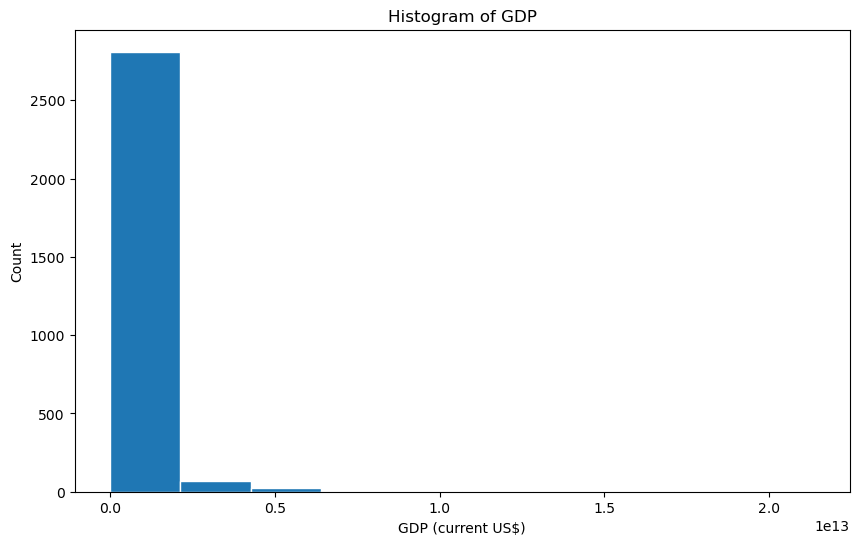

In [8]:
plot_histogram(df['GDP (current US$)'], 'Count', 'GDP (current US$)', 'Histogram of GDP')

C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='GDP (current US$)'>

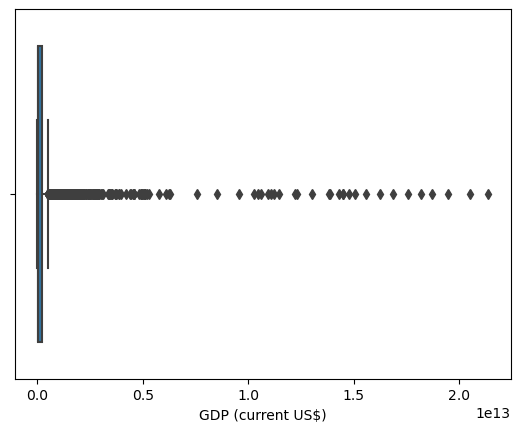

In [9]:
sns.boxplot(data=df, x=df['GDP (current US$)'])

In [10]:
outlier = get_outlier(df, 'GDP (current US$)')[['Country Name', 'Year', 'GDP (current US$)']]
outlier

,Country Name,Year,GDP (current US$)
0,India,2002,514937948874.212
1,Sweden,2016,515654671469.547
2,Poland,2013,515761954074.157
3,Belgium,2008,517328087920.078
4,Sweden,2008,517706149201.196
...,...,...,...
385,United States,2015,18206020741000.000
386,United States,2016,18695110842000.000
387,United States,2017,19477336549000.000
388,United States,2018,20533057312000.000


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='GDP (current US$)'>

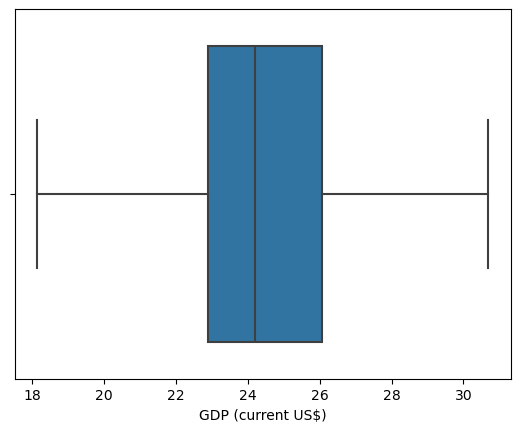

In [11]:
df['GDP (current US$)'] = np.log(df['GDP (current US$)'] + 1)
sns.boxplot(data=df, x=df['GDP (current US$)'])


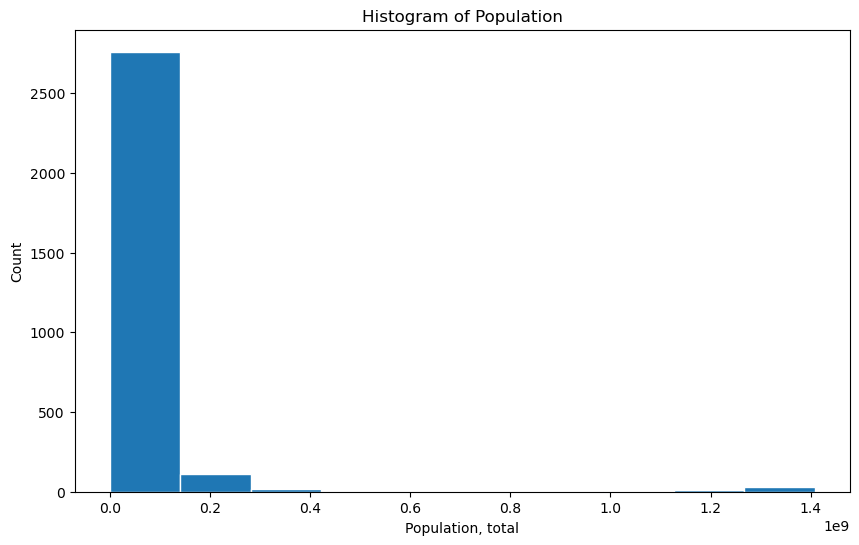

In [12]:
plot_histogram(df['Population, total'], 'Count', 'Population, total', 'Histogram of Population')

In [13]:
outlier = get_outlier(df, 'Population, total')[['Country Name', 'Year', 'Population, total']]
outlier

,Country Name,Year,"Population, total"
0,Turkiye,2014,77181884.000
1,"Iran, Islamic Rep.",2012,77324451.000
2,Ethiopia,2005,77469940.000
3,"Egypt, Arab Rep.",2004,77522427.000
4,Philippines,2000,77958223.000
...,...,...,...
323,India,2019,1383112050.000
324,China,2016,1387790000.000
325,China,2017,1396215000.000
326,China,2018,1402760000.000


C:\Users\Admin\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Population, total'>

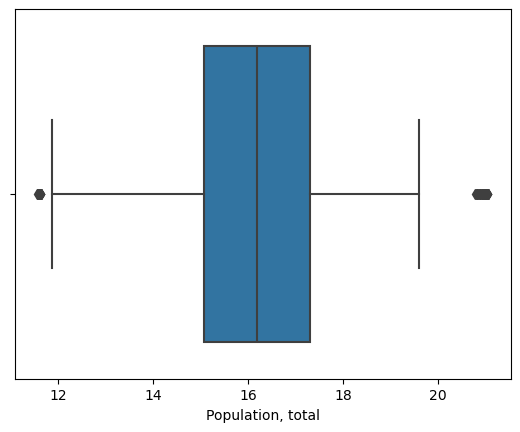

In [14]:
df['Population, total'] = np.log(df['Population, total'] + 1)
sns.boxplot(data=df, x=df['Population, total'])

In [15]:
df.skew(axis = 0, numeric_only = True)

Year                                                                                                   -0.062
Access to clean fuels and technologies for cooking (% of population)                                   -0.484
Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)    0.447
CO2 emissions (metric tons per capita)                                                                  2.030
GDP (current US$)                                                                                       0.167
Current health expenditure per capita (current US$)                                                     2.869
Immunization, HepB3 (% of one-year-old children)                                                       -1.839
Immunization, measles (% of children ages 12-23 months)                                                -1.591
Life expectancy at birth, total (years)                                                                -0.694
Hospital b

In [26]:
get_outlier(df,'Suicide mortality rate (per 100,000 population)')

,index,Country Name,Year,Access to clean fuels and technologies for cooking (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),Current health expenditure per capita (current US$),"Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Life expectancy at birth, total (years)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,1506,Lithuania,2019,100.000,11.785,4.200,24.727,1369.979,92.000,93.000,76.283,6.430,19.300,200.925,8.100,3.800,4.481,10.374,14.843,2.500,26.100,6.260
1,2707,Ukraine,2009,94.300,11.380,5.464,25.524,168.679,66.000,75.000,69.190,9.400,30.800,334.021,17.000,12.300,3.499,18.822,17.645,2.500,26.300,8.840
2,1443,Latvia,2009,100.000,10.970,3.438,23.997,744.662,92.000,92.000,73.080,6.740,26.000,268.979,12.300,8.300,3.176,17.876,14.577,2.500,26.300,17.510
3,221,Belarus,2014,99.300,11.834,6.290,25.090,438.054,97.000,99.000,72.971,10.830,25.700,261.217,11.500,4.300,4.877,20.215,16.061,2.500,26.300,5.908
4,1328,Kazakhstan,2013,92.600,4.183,15.263,26.190,363.275,99.000,99.000,70.620,6.720,27.300,285.972,22.800,14.600,3.878,22.853,16.651,2.500,26.300,5.200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169,1466,Lesotho,2012,33.300,3.347,1.421,21.631,114.649,95.000,91.000,47.835,1.300,45.700,684.938,28.500,86.900,0.165,32.546,14.536,15.200,79.100,15.555
170,1470,Lesotho,2016,37.300,3.598,0.992,21.480,85.996,87.000,90.000,52.264,1.300,46.300,568.273,30.800,77.800,0.357,31.400,14.578,34.000,87.000,16.097
171,1467,Lesotho,2013,34.500,3.326,1.064,21.585,112.772,93.000,90.000,49.002,1.300,47.300,655.398,28.800,85.100,0.213,31.828,14.545,20.000,87.600,15.791
172,1469,Lesotho,2015,36.400,3.283,1.012,21.582,100.829,83.000,93.000,51.101,1.300,47.900,593.377,30.100,82.500,0.309,32.063,14.566,31.900,92.400,16.222


In [16]:
X = df.drop(['Country Name', 'Year', 'Life expectancy at birth, total (years)'], axis=1)
y = df.loc[:,'Life expectancy at birth, total (years)']
X

,Access to clean fuels and technologies for cooking (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),Current health expenditure per capita (current US$),"Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,12.500,0.027,0.080,22.548,25.107,63.000,50.000,0.420,40.900,310.940,15.200,108.600,0.166,46.152,17.011,34.500,5.000,7.925
1,13.900,0.024,0.090,22.665,28.920,63.000,53.000,0.420,40.500,314.837,15.100,104.300,0.166,47.286,17.052,31.900,4.900,7.925
2,15.300,0.021,0.110,23.000,32.717,63.000,55.000,0.420,40.100,318.012,15.000,100.000,0.182,48.420,17.070,28.600,4.800,7.924
3,16.800,0.018,0.166,23.037,39.970,64.000,59.000,0.420,39.400,305.060,15.000,95.900,0.183,49.554,17.090,25.400,4.600,7.928
4,18.200,0.015,0.240,23.242,43.261,63.000,60.000,0.420,38.400,293.605,14.400,91.800,0.220,50.688,17.126,22.200,4.400,7.923
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,30.000,3.748,0.847,23.717,105.098,87.000,86.000,1.700,31.100,419.827,38.700,60.500,0.177,25.929,16.466,32.600,18.000,5.412
2926,30.000,3.718,0.723,23.746,106.190,90.000,95.000,1.700,30.400,409.210,39.900,57.900,0.174,25.327,16.486,35.100,16.800,5.918
2927,29.800,3.688,0.663,23.590,92.254,89.000,90.000,1.700,29.300,405.925,40.100,56.200,0.179,22.582,16.507,36.300,15.000,6.349
2928,30.000,3.658,0.735,24.254,114.634,89.000,88.000,1.700,28.500,391.373,40.600,53.700,0.201,22.086,16.527,38.200,14.000,6.767


In [17]:
y

0      58.361
1      58.684
2      59.111
3      59.852
4      60.364
        ...  
2925   59.591
2926   60.306
2927   60.709
2928   61.414
2929   61.292
Name: Life expectancy at birth, total (years), Length: 2930, dtype: float64

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train

,Access to clean fuels and technologies for cooking (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),Current health expenditure per capita (current US$),"Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
2073,41.300,6.068,0.857,26.180,97.860,89.000,86.000,1.070,24.200,167.239,10.500,31.400,1.178,20.854,18.383,12.500,2.700,3.590
2754,100.000,10.591,5.825,28.620,4037.808,93.000,92.000,2.570,11.300,85.682,3.000,4.400,2.783,10.214,17.999,2.500,8.500,4.810
1282,84.000,3.096,4.453,23.273,252.113,92.000,76.000,1.700,15.500,196.577,12.700,18.400,0.496,15.178,14.809,8.800,1.800,6.619
1572,98.100,0.587,6.441,25.690,161.630,96.000,96.000,1.800,20.400,168.842,24.900,8.200,0.776,20.102,17.071,3.100,4.600,3.530
641,23.100,2.569,0.416,24.548,62.517,79.000,67.000,0.400,23.600,360.727,23.200,90.500,0.226,63.411,16.977,11.900,10.000,2.537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
763,90.000,6.668,2.212,25.105,337.609,81.000,86.000,1.560,21.000,190.068,46.300,35.100,1.409,17.742,16.181,6.000,5.700,5.830
835,100.000,14.434,10.527,23.700,963.020,95.000,95.000,5.370,20.700,229.240,8.800,5.000,3.280,8.592,14.104,2.500,23.300,13.550
1653,97.700,7.618,2.906,23.167,385.772,98.000,99.000,3.400,24.100,192.239,15.000,14.800,1.407,15.012,14.041,5.100,9.000,7.450
2607,100.000,6.120,13.581,23.677,764.354,90.000,94.000,2.600,21.700,204.012,22.100,23.500,1.422,19.971,14.153,10.600,11.200,5.280


In [19]:
scaler = StandardScaler()
transformed_X_train = scaler.fit_transform(X_train)
transformed_X_test = scaler.transform(X_test)
pd.DataFrame(transformed_X_train).to_csv('Datasets/World Bank Transformed/X_train without PCA.csv', index=False, header=X_test.columns)
pd.DataFrame(transformed_X_test).to_csv('Datasets/World Bank Transformed/X_test without PCA.csv', index=False, header=X_test.columns)
y_train.to_csv('Datasets/World Bank Transformed/y_train.csv', index=False)
y_test.to_csv('Datasets/World Bank Transformed/y_test.csv', index=False)

In [20]:
pd.DataFrame(transformed_X_train, columns=X_test.columns)

,Access to clean fuels and technologies for cooking (% of population),"Total alcohol consumption per capita (liters of pure alcohol, projected estimates, 15+ years of age)",CO2 emissions (metric tons per capita),GDP (current US$),Current health expenditure per capita (current US$),"Immunization, HepB3 (% of one-year-old children)","Immunization, measles (% of children ages 12-23 months)","Hospital beds (per 1,000 people)","Mortality from CVD, cancer, diabetes or CRD between exact ages 30 and 70 (%)","Mortality rate, adult, male (per 1,000 male adults)","Mortality caused by road traffic injury (per 100,000 population)","Mortality rate, under-5 (per 1,000 live births)","Physicians (per 1,000 people)","PM2.5 air pollution, mean annual exposure (micrograms per cubic meter)","Population, total",Prevalence of undernourishment (% of population),"Suicide mortality rate (per 100,000 population)","Unemployment, total (% of total labor force) (modeled ILO estimate)"
0,-0.559,0.100,-0.655,0.793,-0.468,0.325,-0.006,-0.727,0.309,-0.511,-0.920,-0.207,-0.286,-0.505,1.298,0.120,-0.874,-0.746
1,0.958,1.176,0.345,1.896,2.029,0.527,0.417,-0.135,-1.339,-1.190,-1.771,-0.865,0.807,-1.130,1.072,-0.824,-0.252,-0.541
2,0.545,-0.607,0.069,-0.521,-0.370,0.477,-0.711,-0.478,-0.803,-0.266,-0.671,-0.524,-0.750,-0.838,-0.803,-0.229,-0.971,-0.238
3,0.909,-1.204,0.469,0.572,-0.427,0.679,0.699,-0.439,-0.177,-0.497,0.713,-0.773,-0.559,-0.549,0.527,-0.767,-0.670,-0.756
4,-1.029,-0.732,-0.744,0.055,-0.490,-0.180,-1.346,-0.991,0.232,1.100,0.520,1.236,-0.934,1.993,0.471,0.064,-0.091,-0.922
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2339,0.700,0.243,-0.383,0.307,-0.316,-0.079,-0.006,-0.534,-0.100,-0.320,3.140,-0.116,-0.128,-0.688,0.003,-0.493,-0.552,-0.370
2340,0.958,2.090,1.291,-0.328,0.080,0.628,0.629,0.970,-0.138,0.006,-1.113,-0.851,1.145,-1.225,-1.218,-0.824,1.336,0.924
2341,0.899,0.469,-0.243,-0.569,-0.285,0.780,0.911,0.193,0.296,-0.302,-0.410,-0.612,-0.130,-0.848,-1.255,-0.578,-0.198,-0.099
2342,0.958,0.112,1.906,-0.338,-0.045,0.376,0.558,-0.123,-0.011,-0.204,0.395,-0.399,-0.120,-0.557,-1.189,-0.059,0.038,-0.462


In [21]:
pca = PCA(n_components=0.9)
pca_data = pca.fit(transformed_X_train)
pca_data.explained_variance_ratio_

array([0.40093816, 0.13106448, 0.08896412, 0.07306554, 0.05330895,
       0.0448115 , 0.03804824, 0.03018307, 0.02647974, 0.0240343 ])

In [22]:
np.cumsum(np.round(pca_data.explained_variance_ratio_, decimals = 4) * 100)

array([40.09, 53.2 , 62.1 , 69.41, 74.74, 79.22, 83.02, 86.04, 88.69,
       91.09])

In [23]:
X_train = pca.transform(transformed_X_train)
X_test = pca.transform(transformed_X_test)
X_train.shape

(2344, 10)

In [24]:
header = [f'PCA{i}' for i in range(1,11)]
pd.DataFrame(X_train).to_csv('Datasets/World Bank Transformed/X_train with PCA.csv', index=False, header=header)
pd.DataFrame(X_test).to_csv('Datasets/World Bank Transformed/X_test with PCA.csv', index=False, header=header)